In [148]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis

In [149]:
def daylength(theta, i):
   
    if theta >= i:
        return 1
    elif ((theta<0) & (np.abs(theta) >=i)):
        return 0
    else:
        return np.arccos(-np.tan(theta) * np.tan(np.pi/2-i)) / np.pi

In [150]:
# phi = np.linspace(0,2*np.pi, 100)
theta = np.linspace(-np.pi/2, np.pi/2, 100)
i = np.arccos(np.random.rand(400))

In [151]:
np.tan(np.pi/2)

1.633123935319537e+16

/home/ekaterina/Documents/000_envs/fleck38/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  fig.canvas.print_figure(bytes_io, **kw)


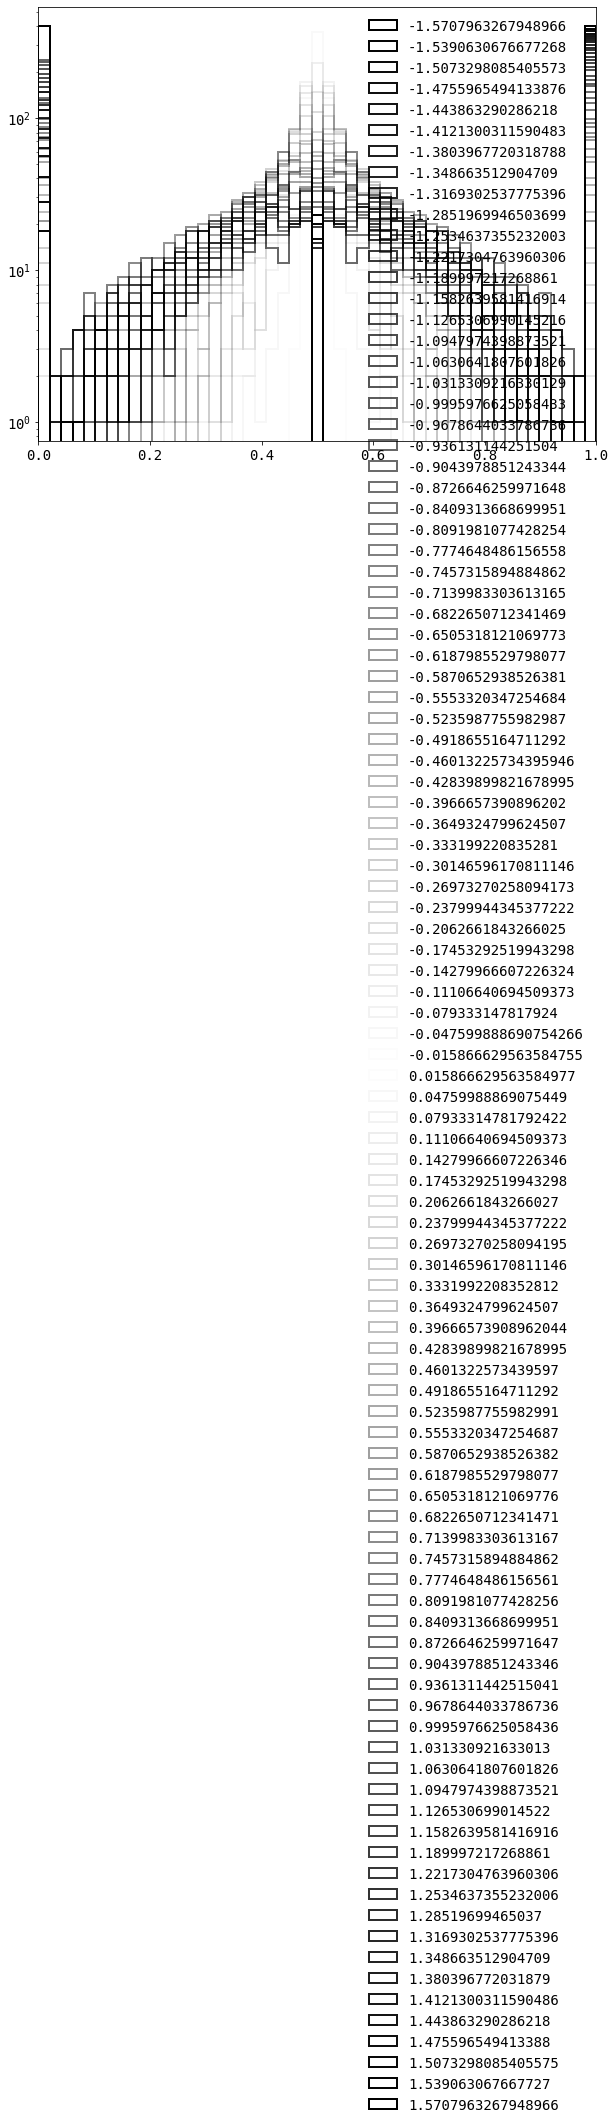

In [152]:
plt.figure(figsize=(10,8))
for t in theta:
    dl = np.vectorize(daylength)(t, i)
    plt.hist(dl, bins=np.linspace(0,1,50), histtype="step", linewidth=2, 
             label=t, edgecolor="k", alpha=np.abs(t)/np.pi*2)
plt.yscale("log")
plt.xlim(0,1)
plt.legend()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0, 0.5, 'std daylength [orbital period]')

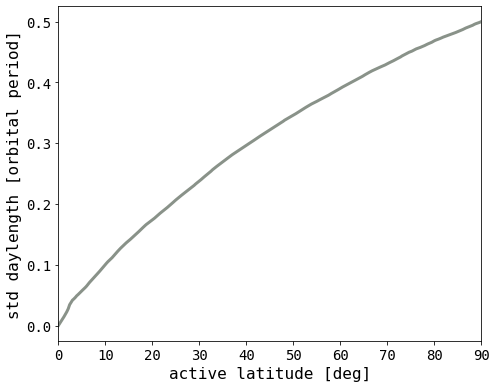

In [165]:
theta = np.linspace(0, np.pi/2, 300)
i = np.arccos(np.random.rand(1000))
plt.figure(figsize=(7,5.5))
ts = []
for t in theta:
    dls = []
    for i_ in i:
        dls.append(daylength(t, i_))
        dls.append(daylength(-t, i_))
    ts.append(np.array(dls).std())
plt.plot(theta*180/np.pi, np.array(ts), linewidth=3)
# plt.yscale("log")
plt.xlim(0,90)
plt.legend()
plt.xlabel("active latitude [deg]")
plt.ylabel("std daylength [orbital period]")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0, 0.5, 'skew daylength [orbital period]')

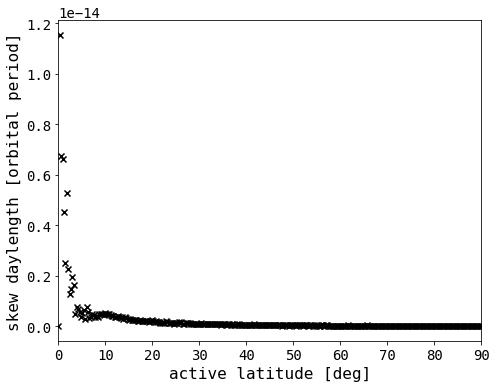

In [155]:
theta = np.linspace(0, np.pi/2, 300)
i = np.arccos(np.random.rand(1000))
plt.figure(figsize=(7,5.5))
for t in theta:
    dls = []
    for i_ in i:
        dls.append(daylength(t, i_))
        dls.append(daylength(-t, i_))
    dl = skew(np.array(dls))
    plt.scatter([t*180/np.pi],[dl],c="k")
# plt.yscale("log")
plt.xlim(0,90)
plt.legend()
plt.xlabel("active latitude [deg]")
plt.ylabel("skew daylength [orbital period]")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0, 0.5, 'kurtosis daylength [orbital period]')

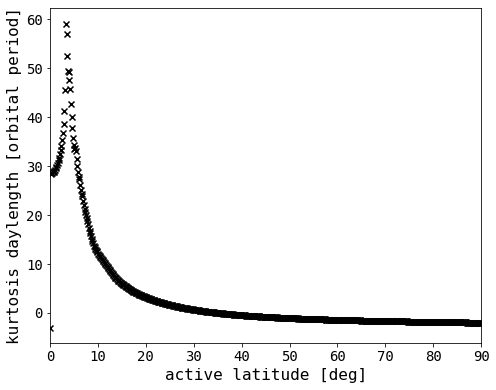

In [159]:
theta = np.linspace(0, np.pi/2, 600)
i = np.arccos(np.random.rand(500))
plt.figure(figsize=(7,5.5))
ts = []
for t in theta:
    dls = []
    for i_ in i:
        dls.append(daylength(t, i_))
        dls.append(daylength(-t, i_))
    ts.append(kurtosis(np.array(dls)))
plt.scatter(theta*180/np.pi, np.array(ts),c="k")
# plt.yscale("log")
plt.xlim(0,90)
plt.legend()
plt.xlabel("active latitude [deg]")
plt.ylabel("kurtosis daylength [orbital period]")

In [6]:
dl

array([0.5       , 0.5000028 , 0.5000112 , 0.50002525, 0.500045  ,
       0.50007052, 0.50010193, 0.50013936, 0.50018297, 0.50023294,
       0.50028951, 0.50035292, 0.50042347, 0.50050151, 0.50058742,
       0.50068166, 0.50078471, 0.50089717, 0.5010197 , 0.50115304,
       0.50129806, 0.50145575, 0.50162726, 0.5018139 , 0.50201722,
       0.502239  , 0.50248135, 0.50274675, 0.50303814, 0.50335906,
       0.50371376, 0.50410743, 0.50454643, 0.50503868, 0.50559415,
       0.50622556, 0.5069494 , 0.50778744, 0.50876905, 0.50993478,
       0.51134229, 0.5130764 , 0.51526727, 0.51812537, 0.52201476,
       0.5276248 , 0.5364392 , 0.55235125, 0.59002223, 0.82656088,
       0.1624015 , 0.40418   , 0.44201941, 0.45798471, 0.46683109,
       0.47246841, 0.47638519, 0.47927264, 0.48149566, 0.48326515,
       0.48471151, 0.48591974, 0.48694759, 0.48783573, 0.48861358,
       0.489303  , 0.48992053, 0.49047897, 0.49098836, 0.49145667,
       0.49189035, 0.49229467, 0.49267396, 0.49303183, 0.49337